In [1]:
from hilbert import operators
from hilbert import spaces

import pandas
import numpy

from matplotlib import pyplot

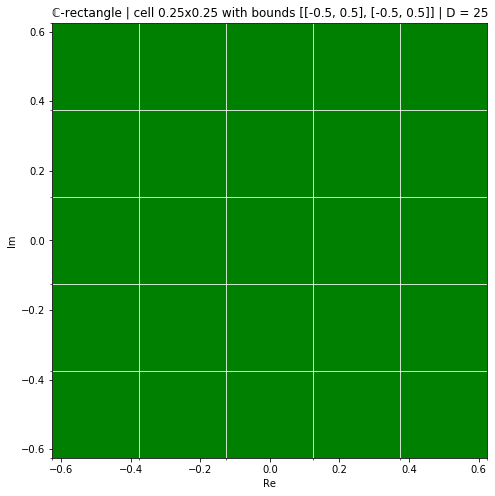

In [2]:
C1L2 = spaces.C1Field.rectangle(spaces.LebesgueCurveSpace, -0.5 - 0.5j, 0.5 + 0.5j, 5)  # make L²-space over ℂ

assert C1L2.bases.bounds == [[-0.5, 0.5], [-0.5, 0.5]]
assert C1L2.bases.dimension == 5**2

A = C1L2.op_from_callable(lambda arr: (numpy.random.normal(size=C1L2.bases.dimension) + 0.5j*numpy.random.normal(size=C1L2.bases.dimension)), raw=True)
H = C1L2.operator((A + A.dagger()).o.to_numpy())  # random Hermitian operator
U = C1L2.unitary_op(H)  # random unitary operator - new basis components
C1L2.map_basis(U, new_key='random')  # create new basis by applying U to the position ('delta') basis
fig, ax = C1L2.bases.plot_domain()  # space domain

In [3]:
assert U.is_unitary()  # since U is obtained by exponentiation of an hermitian operator

entry = U.at(0.25j, -0.5j)  # label `at` access by (x, y) in ℂ²
U.setat(0.25j, -0.5j, entry + 10**(-9))  # set entry `at` (x, y) in ℂ²

assert not U.is_unitary()

U.setat(0.25j, -0.5j, entry)

assert U.is_unitary()

In [4]:
assert C1L2.bases.measure*C1L2.bases.dimension == 1.25**2  # total measure (green) != cell bounds area

In [5]:
# Since U is unitary:
assert C1L2.is_basis('random')  # new basis is actually a basis
assert C1L2.is_orthonormal('random')  # new basis is orthonormal

u, v = C1L2.bases[0.25 - 0.5j, :]  # label `loc` access with x in ℂ

assert u == C1L2.vector('random', C1L2.coords('random', u))  # delta vector as linear combination of the random basis

In [6]:
# new basis images - i.e. components in 'x' - are U's columns
assert all((w.image.i == (1/numpy.sqrt(C1L2.bases.measure))*U.o[ix]).all() for ix, w in C1L2.bases.o['random'].items())

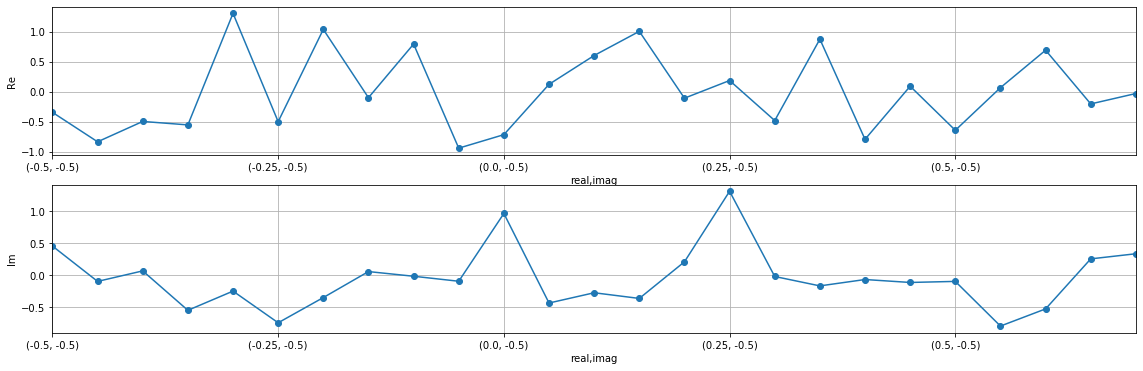

(<Figure size 1397.98x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2be07e2f60>,
       dtype=object))

In [7]:
v.show(style='-o')  # plot a vector

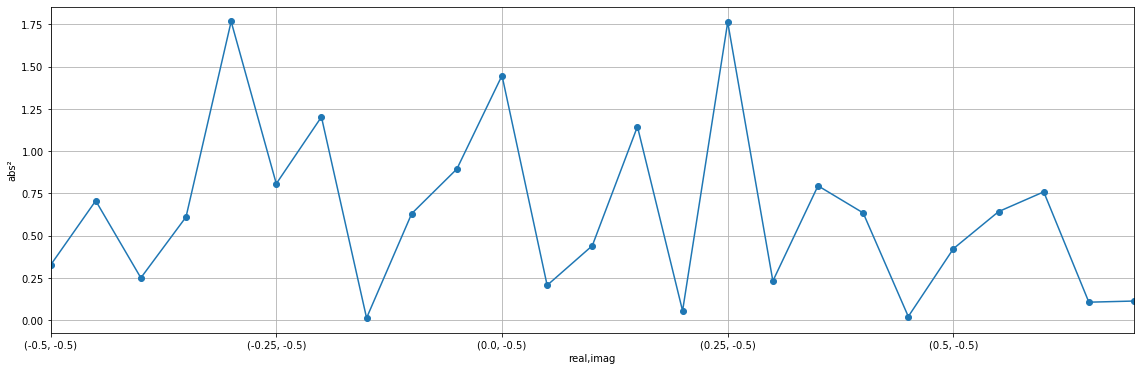

(<Figure size 1397.98x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2be0898898>)

In [8]:
v.show_density(style='-o')  # plot vector abs² values

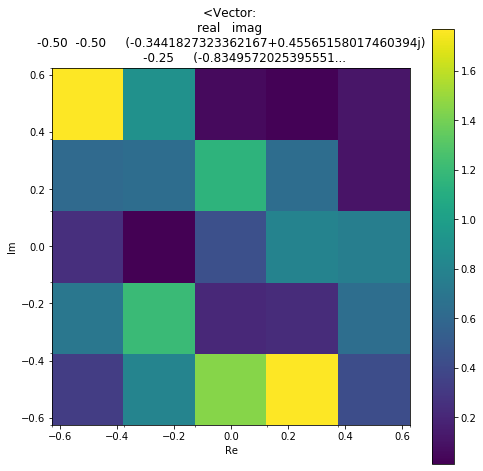

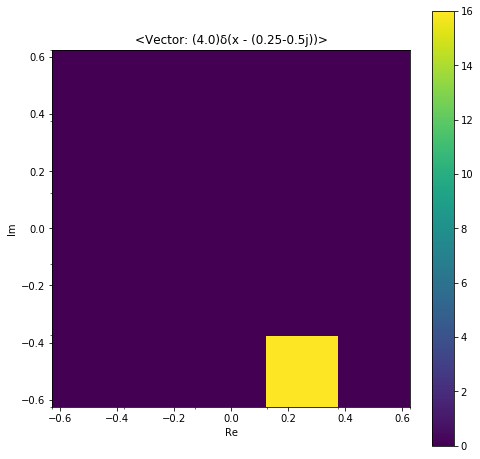

((<Figure size 576x576 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f2be0847b70>),
 (<Figure size 576x576 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f2be06dffd0>))

In [9]:
C1L2.bases.density_plot(v), C1L2.bases.density_plot(u)  # abs² values in the plane

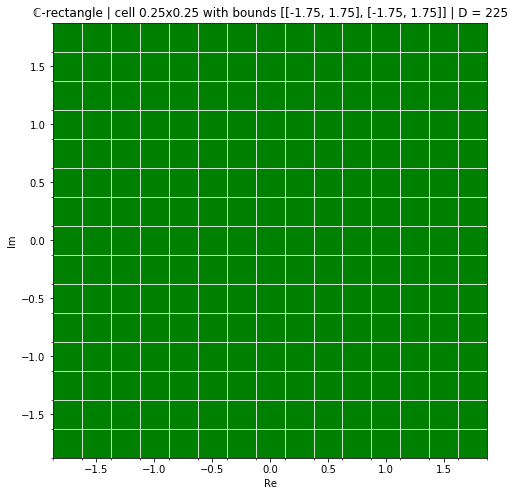

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2be06ce7b8>)

In [10]:
C1L2.extend()  # replicate once in each direction

assert C1L2.bases.dimension == (5*3)**2  # new dimension

C1L2.bases.plot_domain()

In [11]:
assert C1L2.is_basis('random')  # automatically extended by vector replication
assert C1L2.is_orthonormal('random')

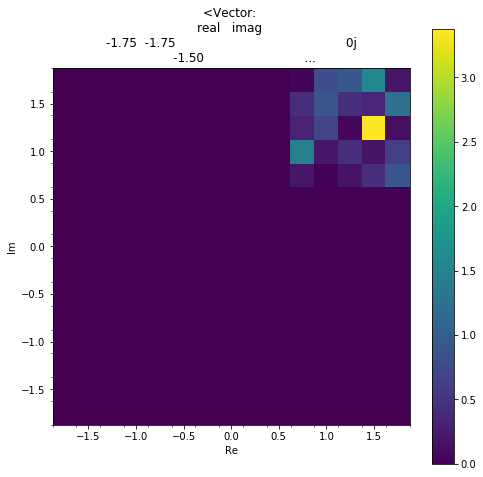

(<Figure size 576x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2bde892860>)

In [12]:
C1L2.bases.density_plot(C1L2.bases.at(1 + 0.75j, 'random'))  # replicated basis vector

In [13]:
C1L2.bases.o  # bases data frame

delta  \
real  imag                               
-1.75 -1.75  (4.0)δ(x - (-1.75-1.75j))   
      -1.50   (4.0)δ(x - (-1.75-1.5j))   
      -1.25  (4.0)δ(x - (-1.75-1.25j))   
      -1.00     (4.0)δ(x - (-1.75-1j))   
      -0.75  (4.0)δ(x - (-1.75-0.75j))   
      -0.50   (4.0)δ(x - (-1.75-0.5j))   
      -0.25  (4.0)δ(x - (-1.75-0.25j))   
       0.00     (4.0)δ(x - (-1.75+0j))   
       0.25  (4.0)δ(x - (-1.75+0.25j))   
       0.50   (4.0)δ(x - (-1.75+0.5j))   
       0.75  (4.0)δ(x - (-1.75+0.75j))   
       1.00     (4.0)δ(x - (-1.75+1j))   
       1.25  (4.0)δ(x - (-1.75+1.25j))   
       1.50   (4.0)δ(x - (-1.75+1.5j))   
       1.75  (4.0)δ(x - (-1.75+1.75j))   
-1.50 -1.75   (4.0)δ(x - (-1.5-1.75j))   
      -1.50    (4.0)δ(x - (-1.5-1.5j))   
      -1.25   (4.0)δ(x - (-1.5-1.25j))   
      -1.00      (4.0)δ(x - (-1.5-1j))   
      -0.75   (4.0)δ(x - (-1.5-0.75j))   
      -0.50    (4.0)δ(x - (-1.5-0.5j))   
      -0.25   (4.0)δ(x - (-1.5-0.25j))   
       0.00      (4.0)δ(x - (-1.5+0j))   
       0.25   (4.0)δ(x - (-1.5+0.25j))   
       0.50    (4.0)δ(x - (-1.5+0.5j))   
       0.75   (4.0)δ(x - (-1.5+0.75j))   
       1.00      (4.0)δ(x - (-1.5+1j))   
       1.25   (4.0)δ(x - (-1.5+1.25j))   
       1.50    (4.0)δ(x - (-1.5+1.5j))   
       1.75   (4.0)δ(x - (-1.5+1.75j))   
...                                ...   
 1.50 -1.75    (4.0)δ(x - (1.5-1.75j))   
      -1.50     (4.0)δ(x - (1.5-1.5j))   
      -1.25    (4.0)δ(x - (1.5-1.25j))   
      -1.00       (4.0)δ(x - (1.5-1j))   
      -0.75    (4.0)δ(x - (1.5-0.75j))   
      -0.50     (4.0)δ(x - (1.5-0.5j))   
      -0.25    (4.0)δ(x - (1.5-0.25j))   
       0.00       (4.0)δ(x - (1.5+0j))   
       0.25    (4.0)δ(x - (1.5+0.25j))   
       0.50     (4.0)δ(x - (1.5+0.5j))   
       0.75    (4.0)δ(x - (1.5+0.75j))   
       1.00       (4.0)δ(x - (1.5+1j))   
       1.25    (4.0)δ(x - (1.5+1.25j))   
       1.50     (4.0)δ(x - (1.5+1.5j))   
       1.75    (4.0)δ(x - (1.5+1.75j))   
 1.75 -1.75   (4.0)δ(x - (1.75-1.75j))   
      -1.50    (4.0)δ(x - (1.75-1.5j))   
      -1.25   (4.0)δ(x - (1.75-1.25j))   
      -1.00      (4.0)δ(x - (1.75-1j))   
      -0.75   (4.0)δ(x - (1.75-0.75j))   
      -0.50    (4.0)δ(x - (1.75-0.5j))   
      -0.25   (4.0)δ(x - (1.75-0.25j))   
       0.00      (4.0)δ(x - (1.75+0j))   
       0.25   (4.0)δ(x - (1.75+0.25j))   
       0.50    (4.0)δ(x - (1.75+0.5j))   
       0.75   (4.0)δ(x - (1.75+0.75j))   
       1.00      (4.0)δ(x - (1.75+1j))   
       1.25   (4.0)δ(x - (1.75+1.25j))   
       1.50    (4.0)δ(x - (1.75+1.5j))   
       1.75   (4.0)δ(x - (1.75+1.75j))   

                                                        random  
real  imag                                                      
-1.75 -1.75  \nreal   imag \n-1.75  -1.75    (-0.2255883039...  
      -1.50  \nreal   imag \n-1.75  -1.75    (-1.1578697763...  
      -1.25  \nreal   imag \n-1.75  -1.75     (-0.494059091...  
      -1.00  \nreal   imag \n-1.75  -1.75      (0.055389373...  
      -0.75  \nreal   imag \n-1.75  -1.75    (-0.6337754266...  
      -0.50  \nreal   imag \n-1.75  -1.75                  ...  
      -0.25  \nreal   imag \n-1.75  -1.75                  ...  
       0.00  \nreal   imag \n-1.75  -1.75                  ...  
       0.25  \nreal   imag \n-1.75  -1.75                  ...  
       0.50  \nreal   imag \n-1.75  -1.75                  ...  
       0.75  \nreal   imag \n-1.75  -1.75                  ...  
       1.00  \nreal   imag \n-1.75  -1.75                  ...  
       1.25  \nreal   imag \n-1.75  -1.75                  ...  
       1.50  \nreal   imag \n-1.75  -1.75                  ...  
       1.75  \nreal   imag \n-1.75  -1.75                  ...  
-1.50 -1.75  \nreal   imag \n-1.75  -1.75      (-0.33676635...  
      -1.50  \nreal   imag \n-1.75  -1.75       (-0.1914080...  
      -1.25  \nreal   imag \n-1.75  -1.75     (-0.258954445...  
      -1.00  \nreal   imag \n-1.75  -1.75        (1.3966567...  
      -0.75  \nreal  

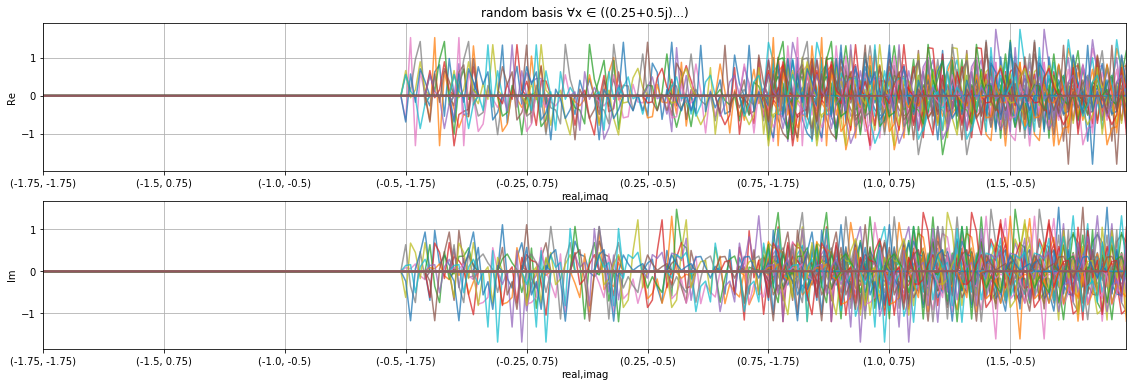

(<Figure size 1397.98x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2bdeb42a90>,
       dtype=object))

In [14]:
C1L2.show_basis_slice('random', 0.25 + 0.5j, style='-', alpha=0.75)  # transformed basis curves

In [15]:
image_curve = v.curves[0]  # `ImageCurve`s lack analytical definition
image_curve

<ImageCurve: 
real   imag 
-1.75  -1.75    0j
       -1.50    0j
       -1.25    0j
       -1.00    0j
       -0.75    0j
       -0.50    0j
       -0.25    0j
        0.00    0j
        0.25    0j
        0.50    0j
        0.75    0j
        1.00    0j
        1.25    0j
        1.50    0j
        1.75    0j
-1.50  -1.75    0j
       -1.50    0j
       -1.25    0j
       -1.00    0j
       -0.75    0j
       -0.50    0j
       -0.25    0j
        0.00    0j
        0.25    0j
        0.50    0j
        0.75    0j
        1.00    0j
        1.25    0j
        1.50    0j
        1.75    0j
                ..
 1.50  -1.75    0j
       -1.50    0j
       -1.25    0j
       -1.00    0j
       -0.75    0j
       -0.50    0j
       -0.25    0j
        0.00    0j
        0.25    0j
        0.50    0j
        0.75    0j
        1.00    0j
        1.25    0j
        1.50    0j
        1.75    0j
 1.75  -1.75    0j
       -1.50    0j
       -1.25    0j
       -1.00    0j
       -0.75    0j
    

In [16]:
assert all([3.14*image_curve != image_curve, not image_curve == 3])  # `ImageCurve`s algebra and comparison
assert (image_curve(numpy.array([0.25])) == numpy.array([image_curve.image[0.25]])).all()  # `ImageCurve`s evaluation

In [17]:
assert (U == ((+U.dagger() + U)*0.5 + (-U.dagger() + U)/2))  # operator algebra

In [18]:
(1 + 1j*U.dagger()@H@U - H**2)[-0.2j:0.4j, :0.2]  # operator algebra and slicing

real                                          -0.50  \
imag                                          -0.50   
real imag                                             
0.0  0.00   (1.129266597533323-0.5834172275510804j)   
     0.25  (4.6297957079191985+3.2175870150813326j)   

real                                                  \
imag                                           -0.25   
real imag                                              
0.0  0.00  (0.23466159038260104+2.1437248785608434j)   
     0.25  (0.48596902161515754-2.9880992656586822j)   

real                                                      \
imag                                                0.00   
real imag                                                  
0.0  0.00       (0.7954127960796638-0.0933018050941499j)   
     0.25  (-0.7810659063754769-0.00039975815094739353j)   

real                                                 \
imag                                           0.25   
real imag                                             
0.0  0.00  (0.3907555152715918-0.5680235864716339j)   
     0.25   (2.050624917755039-2.6577824303363453j)   

real                                                  \
imag                                            0.50   
real imag                                              
0.0  0.00  (-2.9505187097379957+1.6031397279916848j)   
     0.25   (-0.463618553637287+1.0384918689997114j)   

real                                           -0.25  \
imag                                           -0.50   
real imag                                              
0.0  0.00  (1.3533316512408382-0.43811847303690266j)   
     0.25    (-1.586651706153816+2.561886938890252j)   

real                                                  \
imag                                           -0.25   
real imag                                              
0.0  0.00    (-3.586984222360318-5.799066429400103j)   
     0.25  (0.06809096650802238-0.5213466097248242j)   

real                                                  \
imag                                            0.00   
real imag                                              
0.0  0.00  (0.6345476647974841-0.12999569227114965j)   
     0.25   (-0.5565667897047104-1.071851130408607j)   

real                                                  \
imag                                            0.25   
real imag                                              
0.0  0.00  (1.2972134925408187-0.33047943198712076j)   
     0.25    (0.9262490615878751-2.132498841214458j)   

real                                                  \
imag                                            0.50   
real imag                                              
0.0  0.00   (0.8280813553365111+1.1975418567036098j)   
     0.25  (0.9744181224727634-0.47703220196337237j)   

real                                            0.00  \
imag                                           -0.50   
real imag                                              
0.0  0.00  (0.6185376625777274-0.24541488709425388j)   
     0.25   (0.5456395528684457+0.9992352598557288j)   

real                                                   \
imag                                            -0.25   
real imag                                               
0.0  0.00   (0.9515454011758476-0.10672135780286975j)   
     0.25  (-0.04769665641164322+0.0347064564816415j)   

real                                                   \
imag                                             0.00   
real imag                                               
0.0  0.00    (0.1519579051028973-0.9208920104426491j)   
     0.25  (-5.470290658590298-0.006396103615520232j)   

real                                                  \
imag                                            0.25   
real imag                                              
0.0  0.00   (-4.4677261149492935+4.994498870324049j)   
     0.25  (0.9148152079991327-0.29186433835065917j)   

real                                          

In [19]:
assert (1 - H).at(0.25 - 0.5j, 0.5 - 0.25j) == (1 - H)[0.25 - 0.5j, 0.5 - 0.25j] # rsub

In [20]:
H[0.2j:0.8j, :0.2j] = 33j - 11  # set slice by (x, y) in ℂ²
assert (H[0.2j:0.8j, :0.2j] == -11 + 33j).all().all()